### Standortproblem

[Schone beschreibung](https://books.google.de/books?id=zvdExlmEx4IC&pg=PA87&lpg=PA87&dq=unfallorte+algorithmus+hubschrauber&source=bl&ots=aDquB_J-TN&sig=IcPhIGchFHeWvRc_Days-rbpxRI&hl=en&sa=X&ved=0ahUKEwjO9Y_vgYPZAhUJI8AKHQpsD8EQ6AEIKTAA#v=onepage&q=unfallorte%20algorithmus%20hubschrauber&f=false) des Problemes;

In [1]:
# from sympy import *
import numpy as n
from math import sqrt
# init_printing()

1) Generate random points and plot them
2) Set some of them to be Hubschaubers
3) Connect each point to the closes HS

In [2]:
nOfPoints=400;
nOfAP=4;

In [3]:
from random import random
from random import randint
import math

In [4]:
# X,Y und UnfallWahrscheinlichkeit,current_airport
points=[]
for i in range(nOfPoints):
    points.append([randint(0,100),randint(0,100),randint(0,100),nOfAP+1])

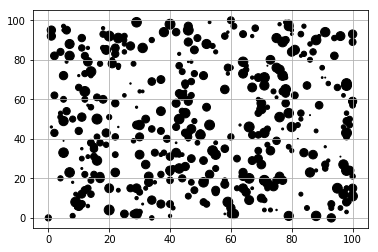

In [5]:
from matplotlib import pyplot as p
from matplotlib import colors,style

# https://matplotlib.org/users/colormaps.html more about colorschemes and normalization
norm=colors.Normalize(vmin=0, vmax=nOfAP);
#print(norm(a))

#style.use('seaborn');

p.gray()
#leaving it on purpose, marker size is nice
x,y,w,a=zip(*points);
p.grid();
p.scatter(x,y,w,norm(a),marker='o',linewidth='1',edgecolor='black')
p.show()

We add the helicopter locations randomly

In [6]:
aps=[]
for i in range(nOfAP):
    currPoint=randint(0,nOfPoints-1); #INCLUSIVE,apparently...
    print(currPoint);
    aps.append([points[currPoint][0],points[currPoint][1]]);

192
296
193
133


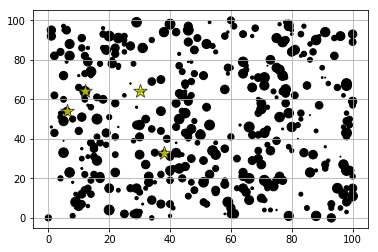

In [7]:
x,y,w,a=zip(*points);
xa,ya=zip(*aps);
p.grid();
p.scatter(x,y,w,norm(a),marker='o',linewidth='1',edgecolor='black')
p.scatter(xa,ya,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black',alpha=0.7)
#print(aps);
p.show()

Function definitions:

In [8]:
# Distance between X and Y
def dist(x,y):
    res=sqrt(pow((x[1]-y[1]),2) + pow((x[0]-y[0]),2))
#    print(x[1],x[0],y[1],y[0])
#    print(res)
    rr=float(res)
#    print(rr)
    return rr;

# Tell the points the closest airport to them:
def PtoA(points,aps):
    # For each point, look to which of the airports its the closes, and assign it to it
    for i in range(len(points)):
    #    print(i, ": Iterating point ", i, " with coords ", points[i][0],points[i][1])
        # max distance = 100
        m=1000;
        for j in range(len(aps)):
    #        print("  ",j,": Iterating airport",j," with coords ", aps[j][0],aps[j][1])
            d=dist(points[i],aps[j]);
    #        print("  Distance between them is ",d)
            if d<m:
    #            print("      current m is:",m);
    #            print("      current d is:",d);
    #            print(">>      d<m");
                m=d;
                # We set the closest airport in the array
                points[i][3]=j;
    return(points);

# Center of mass of points given by array of x,y,w
def cm(x,y,w):
    cmysum,cmxsum=0,0;
    weightsum=sum(w)
    
    for i in range(len(x)):
        cmxsum+=x[i]*w[i]
        cmysum+=y[i]*w[i]
    cmy=cmysum/weightsum;
    cmx=cmxsum/weightsum;
    return(cmx,cmy)

#Which points belong to which airports to separate array
def AtoP(points,aps):
#apoints=[[]]*nOfAP;
    apoints=[]
    for i in range(len(aps)):
        apoints.append([]);

    for i in range(len(points)):
        apoints[points[i][3]].append(points[i]);
    return(apoints);

def calculate_cmasses(apoints):
    cmasses=[];
    for a in apoints:
        if a:
            x,y,w,a=zip(*a);
            cmx,cmy=cm(x,y,w);
            cmasses.append([cmx,cmy]);
    return cmasses

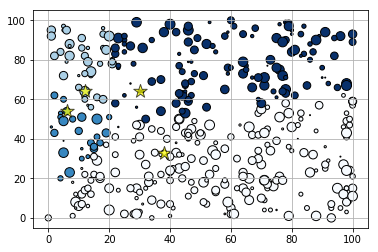

In [9]:
points=PtoA(points,aps);
x,y,w,a=zip(*points);
xa,ya=zip(*aps);

p.grid();
p.scatter(x,y,w,norm(a),marker='o',linewidth='1',edgecolor='black',cmap='Blues')
p.scatter(xa,ya,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black',alpha=0.7)
p.show()

Now we start thinking of the algorithm

In [10]:
apoints=AtoP(points,aps);
cmasses=calculate_cmasses(apoints);

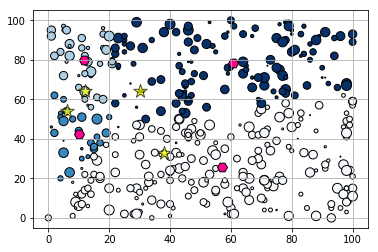

In [11]:
# Plot all points and all airports
cmx,cmy=zip(*cmasses);
xa,ya=zip(*aps);
x,y,w,a=zip(*points);

norm=colors.Normalize(vmin=0., vmax=float(nOfAP*2));

p.grid();
p.scatter(x,y,w,norm(a),marker='o',linewidth='1',edgecolor='black',cmap='Blues')
p.scatter(xa,ya,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black',alpha=0.7)
p.scatter(cmx,cmy,c='xkcd:hot pink',marker='H',s=100,linewidth='1',edgecolor='black')
#for xy in zip(aps[0],aps[1]):                                       # <--
#    p.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--
p.show()

In [12]:
#whatever. We start the process,seeing that nothing moves
# and we create a reeeeally big object saving "versions" of the data we have, so that we'll be able to play it back later
universe=[];
eps=0;
while eps==0:
    # Add the beginning
    universe.append([[x,y,w,a],[cmx,cmy],[xa,ya]]);
    bew=0;
    # Airport in Centroid for all centroids
    for i in range(len(cmasses)):
        if (aps[i][0]!=cmasses[i][0]):
            print(">",aps[i][0],cmasses[i][0]);
            aps[i][0]=cmasses[i][0];
            bew=1;
        if (aps[i][1]!=cmasses[i][1]):
            aps[i][1]=cmasses[i][1];
            bew=1;
    # If there was no movement, it's over
    if bew==0:
        eps=1;
    # We update to which airport belong the points, based on the new position of the airports
    points=PtoA(points,aps);
    apoints=AtoP(points,aps);
    cmasses=calculate_cmasses(apoints);
    
    cmx,cmy=zip(*cmasses);
    x,y,w,a=zip(*points);
    xa,ya=zip(*aps);
    
    
    
    #p.grid();
    #p.scatter(x,y,w,norm(a),marker='o',cmap='Blues',linewidth='1',edgecolor='black')
    #p.scatter(*zip(*aps),c='xkcd:hot pink',marker='H',s=100,linewidth='1',edgecolor='black')
    #p.scatter(cmx,cmy,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black')
    #p.show();

#universe
    
    

> 38 57.019344069128046
> 12 11.699248120300751
> 6 9.93931623931624
> 30 60.801123786821044
> 57.019344069128046 62.95335463258786
> 11.699248120300751 16.008565310492504
> 9.93931623931624 16.282890673255096
> 60.801123786821044 69.61370996761426
> 62.95335463258786 67.97007014809041
> 16.008565310492504 18.44621372965322
> 16.282890673255096 21.38783180643646
> 69.61370996761426 71.53206302674973
> 67.97007014809041 71.52
> 18.44621372965322 21.02512406947891
> 21.38783180643646 25.140510587769644
> 71.53206302674973 73.72721822541966
> 71.52 74.08189158016148
> 21.02512406947891 23.90447598253275
> 25.140510587769644 27.166666666666668
> 73.72721822541966 76.31757950530036
> 74.08189158016148 75.02321857485988
> 23.90447598253275 24.911122397155918
> 27.166666666666668 28.234366789280084
> 76.31757950530036 77.79295154185021
> 24.911122397155918 25.441067457375834
> 28.234366789280084 28.306746310611384
> 77.79295154185021 78.35323383084577
> 75.02321857485988 74.84919354838709
> 2

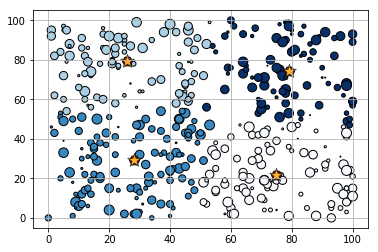

In [13]:

# Plot all points and all airports
cmx,cmy=zip(*cmasses);
x,y,w,a=zip(*points);
xa,ya=zip(*aps);

norm=colors.Normalize(vmin=0., vmax=float(nOfAP*2));

p.grid();
p.scatter(x,y,w,norm(a),marker='o',cmap='Blues',linewidth='1',edgecolor='black')
p.scatter(cmx,cmy,c='xkcd:hot pink',marker='H',s=100,linewidth='1',edgecolor='black')
p.scatter(xa,ya,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black',alpha=0.7)
p.show()
#universe

c: [(57.019344069128046, 11.699248120300751, 9.93931623931624, 60.801123786821044), (25.729673998428908, 80.0803932909196, 42.63247863247863, 78.35859015835177)]
a: [(38, 12, 6, 30), (33, 64, 54, 64)]
-


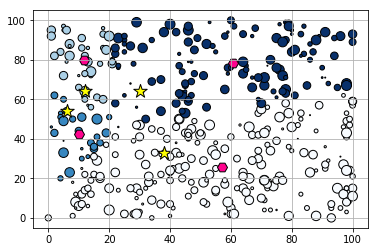

c: [(62.95335463258786, 16.008565310492504, 16.282890673255096, 69.61370996761426), (24.103642172523962, 83.01841541755888, 33.148548486720195, 75.70636919755307)]
a: [(57.019344069128046, 11.699248120300751, 9.93931623931624, 60.801123786821044), (25.729673998428908, 80.0803932909196, 42.63247863247863, 78.35859015835177)]
-


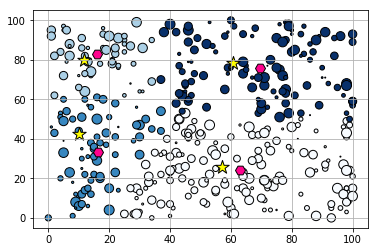

c: [(67.97007014809041, 18.44621372965322, 21.38783180643646, 71.53206302674973), (23.543881527669523, 82.3761500353857, 29.01010101010101, 73.88145840967387)]
a: [(62.95335463258786, 16.008565310492504, 16.282890673255096, 69.61370996761426), (24.103642172523962, 83.01841541755888, 33.148548486720195, 75.70636919755307)]
-


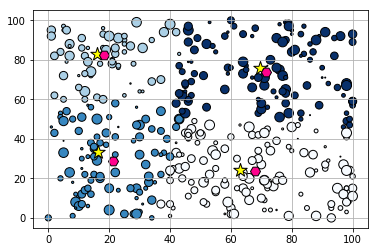

c: [(71.52, 21.02512406947891, 25.140510587769644, 73.72721822541966), (23.158942731277534, 82.32909429280397, 28.812784484464675, 73.56574740207834)]
a: [(67.97007014809041, 18.44621372965322, 21.38783180643646, 71.53206302674973), (23.543881527669523, 82.3761500353857, 29.01010101010101, 73.88145840967387)]
-


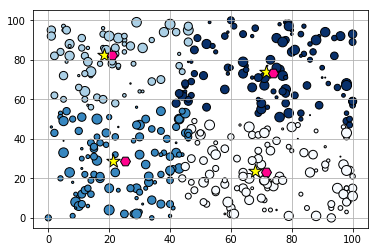

c: [(74.08189158016148, 23.90447598253275, 27.166666666666668, 76.31757950530036), (22.335832372164553, 80.81468340611353, 29.21952535059331, 74.15083922261483)]
a: [(71.52, 21.02512406947891, 25.140510587769644, 73.72721822541966), (23.158942731277534, 82.32909429280397, 28.812784484464675, 73.56574740207834)]
-


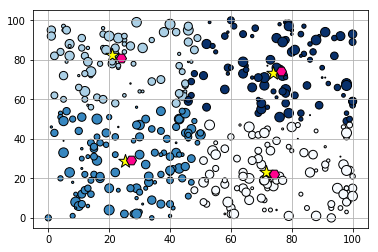

c: [(75.02321857485988, 24.911122397155918, 28.234366789280084, 77.79295154185021), (21.852081665332264, 79.5048247841544, 29.136626379400944, 74.65012752144679)]
a: [(74.08189158016148, 23.90447598253275, 27.166666666666668, 76.31757950530036), (22.335832372164553, 80.81468340611353, 29.21952535059331, 74.15083922261483)]
-


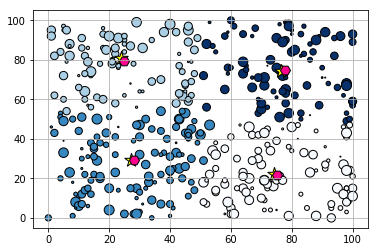

c: [(75.02321857485988, 25.441067457375834, 28.306746310611384, 78.35323383084577), (21.852081665332264, 79.60835186557944, 29.065354884047785, 74.33830845771145)]
a: [(75.02321857485988, 24.911122397155918, 28.234366789280084, 77.79295154185021), (21.852081665332264, 79.5048247841544, 29.136626379400944, 74.65012752144679)]
-


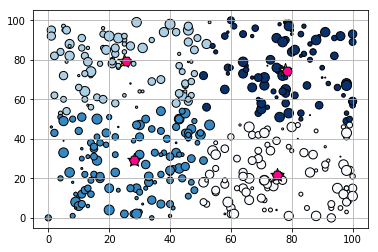

c: [(74.84919354838709, 25.935775335775336, 28.234366789280084, 78.95467557251908), (21.669556451612902, 79.59804639804639, 29.136626379400944, 74.13979007633588)]
a: [(75.02321857485988, 25.441067457375834, 28.306746310611384, 78.35323383084577), (21.852081665332264, 79.60835186557944, 29.065354884047785, 74.33830845771145)]
-


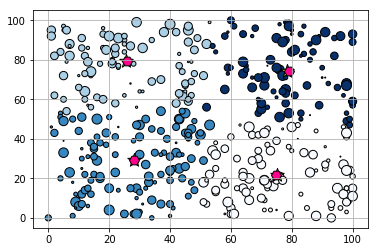

c: [(74.84919354838709, 25.935775335775336, 28.234366789280084, 78.95467557251908), (21.669556451612902, 79.59804639804639, 29.136626379400944, 74.13979007633588)]
a: [(74.84919354838709, 25.935775335775336, 28.234366789280084, 78.95467557251908), (21.669556451612902, 79.59804639804639, 29.136626379400944, 74.13979007633588)]
-


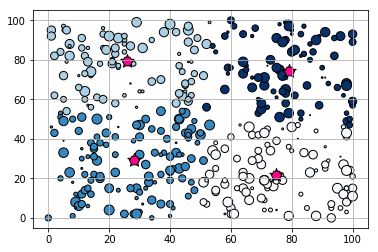

In [14]:
#1let's try without animations
#print(universe[0][0][0][0]);
#import pprint
#pprint.pprint(universe)

for i in range(len(universe)):
    p.grid();
    print("c:",universe[i][1])
    print("a:",universe[i][2])
    print("-");
    p.scatter(universe[i][0][0],universe[i][0][1],universe[i][0][2],norm(universe[i][0][3]),marker='o',cmap='Blues',linewidth='1',edgecolor='black')
    p.scatter(universe[i][2][0],universe[i][2][1],c='yellow',marker='*',s=200,linewidth='1',edgecolor='black')
    p.scatter(universe[i][1][0],universe[i][1][1],c='xkcd:hot pink',marker='H',s=100,linewidth='1',edgecolor='black')
    p.show();


0


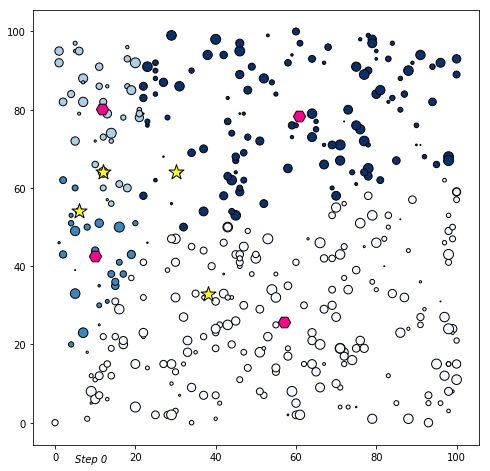

0
0
1
2
3
4
5
6
7
8


In [15]:
import numpy as np;
import matplotlib.pyplot as plt;
from matplotlib.animation import FuncAnimation
from matplotlib import rc

fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(20,80),ylim=(20,80))

#scatter=ax.scatter(universe[0][0][0],universe[0][0][1],universe[0][0][2],norm(universe[0][0][3]),marker='o',cmap='Blues',linewidth='1',edgecolor='black')
#scatter=ax.scatter(universe[0][0][0],universe[0][0][1],universe[0][0][2],norm(universe[0][0][3]),marker='o',cmap='Blues',linewidth='1',edgecolor='black')
#scatter=ax.scatter(universe[0][2][0],universe[0][2][1],c='yellow',marker='*',s=250,linewidth='1',edgecolor='black')
#scatter=ax.scatter(universe[0][1][0],universe[0][1][1],c='xkcd:hot pink',marker='H',s=150,linewidth='1',edgecolor='black')


def update(i):
    global universe;
    ax.clear()
    scatter=ax.scatter(universe[i][0][0],universe[i][0][1],universe[i][0][2],norm(universe[i][0][3]),marker='o',cmap='Blues',linewidth='1',edgecolor='black')
    scatter=ax.scatter(universe[i][2][0],universe[i][2][1],c='yellow',marker='*',s=250,linewidth='1',edgecolor='black')
    scatter=ax.scatter(universe[i][1][0],universe[i][1][1],c='xkcd:hot pink',marker='H',s=150,linewidth='1',edgecolor='black')
    scatter=ax.text(5, -10, 'Step '+str(i), style='italic')

    print(i);
    return scatter;

anim = FuncAnimation(fig, update, interval=500,frames=len(universe))
plt.show() 
from IPython.display import HTML,Image
rc('animation', html='html5')

anim
#HTML(anim.to_html5_video())

In [16]:
anim